# DIMENSIONALITY REDUCTION TECHNIQUES

Loading dataset & preprocessing

In [2]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
df.shape

(918, 12)

In [6]:
#checking the column names
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
#let's have a look at our dataset
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [8]:
#lets check the statistic summary of the dataset
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
#Let's look for outliers
df_var = df.select_dtypes(include=['int', 'float'])
df_var.head()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


Text(0.5, 0, 'Range')

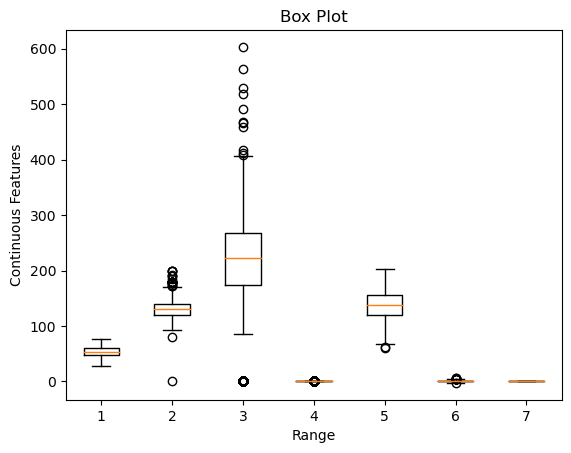

In [14]:
#lets plot a box plot with all continuous features
plt.boxplot(df_var)

#Adding labels and titles
plt.title("Box Plot")
plt.ylabel("Continuous Features")
plt.xlabel("Range")

Colestrol seems to have high number of outliers followed by RestingBP

In [16]:
#Looking for missing values
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Seems like there are no null values

Splitting the dataset into dependent and independent variables

In [19]:
X = df.iloc[::,:11]
Y = df.iloc[::,11::]
print(Y.head())
print(X.head())

   HeartDisease
0             0
1             1
2             0
3             1
4             0
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  
0              N      0.0       Up  
1              N      1.0     Flat  
2              N      0.0       Up  
3              Y      1.5     Flat  
4              N      0.0       Up  


In [25]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


## Standardising and Spliting the data frame to fit model before dimensionality reduction

In [47]:
#Standardising numeric columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_num = X.select_dtypes(include=['int', 'float'])
X_cat = X.select_dtypes(include=['object'])
X_scaled = scaler.fit_transform(X_num)
X_scaled = pd.DataFrame(data=X_scaled,columns=X_num.columns)
X_scaled.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,-1.433140,0.410909,0.825070,-0.551341,1.382928,-0.832432
1,-0.478484,1.491752,-0.171961,-0.551341,0.754157,0.105664
2,-1.751359,-0.129513,0.770188,-0.551341,-1.525138,-0.832432
3,-0.584556,0.302825,0.139040,-0.551341,-1.132156,0.574711
4,0.051881,0.951331,-0.034755,-0.551341,-0.581981,-0.832432


In [53]:
X_num.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
0,40,140,289,0,172,0.0
1,49,160,180,0,156,1.0
2,37,130,283,0,98,0.0
3,48,138,214,0,108,1.5
4,54,150,195,0,122,0.0


In [48]:
X_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,M,ATA,Normal,N,Up
1,F,NAP,Normal,N,Flat
2,M,ATA,ST,N,Up
3,F,ASY,Normal,Y,Flat
4,M,NAP,Normal,N,Up


Combining dataframe of numeric and categorical columns

One hot encodding for categorical variables

In [49]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

for col in X_cat.columns:
    X_cat[col] = label_encoder.fit_transform(X_cat[col])
#X_cat = label_encoder.fit_transform(X_cat)
X_cat.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,1,1,1,0,2
1,0,2,1,0,1
2,1,1,2,0,2
3,0,0,1,1,1
4,1,2,1,0,2


In [50]:
X = pd.concat([X_num,X_cat],axis = 1)
X.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,40,140,289,0,172,0.0,1,1,1,0,2
1,49,160,180,0,156,1.0,0,2,1,0,1
2,37,130,283,0,98,0.0,1,1,2,0,2
3,48,138,214,0,108,1.5,0,0,1,1,1
4,54,150,195,0,122,0.0,1,2,1,0,2


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y)

In [52]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)

C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8304347826086956

We are getting an accuracy of 83% without using any dimensionality Redction technique

## PCA

In [81]:
from sklearn.decomposition import PCA
#Using PCA components such that 95% of variation is retained.
pca = PCA(0.95)
X_pca = pca.fit_transform(X_num)
X_pca.shape

(918, 2)

In [82]:
pca.explained_variance_ratio_

array([0.92036328, 0.049129  ])

The variation explained by 1st PC is 92% and by 2nd PC is 4%. We will be just moving forward with 2 PCs

In [83]:
X_pca = pd.DataFrame(X_pca)

In [84]:
X_pca.head()

,0,1
0,92.310596,-29.435969
1,-17.143937,-13.737187
2,81.906347,38.236632
3,13.654504,28.739039
4,-4.348715,18.108827


In [85]:
X_pca.info

<bound method DataFrame.info of              0          1
0    92.310596 -29.435969
1   -17.143937 -13.737187
2    81.906347  38.236632
3    13.654504  28.739039
4    -4.348715  18.108827
..         ...        ...
913  64.490943   1.440299
914  -5.471989   0.825807
915 -69.003158  17.325238
916  39.205778 -33.595501
917 -21.437801 -37.207652

[918 rows x 2 columns]>

In [86]:
#let's contact the PCA dataframe with the numeric dataframe.
X1 = pd.concat([X_pca,X_cat],axis = 1)
X1.head()

,0,1,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,92.310596,-29.435969,1,1,1,0,2
1,-17.143937,-13.737187,0,2,1,0,1
2,81.906347,38.236632,1,1,2,0,2
3,13.654504,28.739039,0,0,1,1,1
4,-4.348715,18.108827,1,2,1,0,2


In [87]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1,Y)

In [88]:
model.fit(X_train1,Y_train1)
model.score(X_test1,Y_test1)

C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

0.8217391304347826

After reducing the dimension using PCA, we have increased the accuracy of model by 4%.

Now let's check the accuracy by just using 1st PC

In [92]:
#let's contact the PCA dataframe with the numeric dataframe.
X2 = pd.concat([X_pca.iloc[::,:1],X_cat],axis = 1)
X2.head()

,0,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope
0,92.310596,1,1,1,0,2
1,-17.143937,0,2,1,0,1
2,81.906347,1,1,2,0,2
3,13.654504,0,0,1,1,1
4,-4.348715,1,2,1,0,2


In [93]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y, test_size=0.2, random_state=30)

model = LogisticRegression(max_iter=1000)
model.fit(X_train2, Y_train2)
model.score(X_test2, Y_test2)

C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\BharviC\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


0.8315217391304348

Using just 1 PC is increasing the accuracy by 1% as that 1 PC is explaining 95% of variation in all 6 numeric features combined.

## Factor Analysis

In [100]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity,calculate_kmo
from factor_analyzer import FactorAnalyzer

### Bartlett's Test of Sphericity:          
It tests whether the correlation coefficients are all 0. The test computes the probability that the correlation matrix has significant correlations among at least some of the variables in a dataset, a prerequisite for factor analysis to work.

In [97]:
#Let's check the correlation coefficients between all the numeric variables. We need to check the hypothesis whether 
#all the coefficient correlation coefficients are 0.
chi2,p = calculate_bartlett_sphericity(X_num)
print("Bartlett Sphericity Test")
print("Chi Squared Test")
print("P Value:",p)

Bartlett Sphericity Test
Chi Squared Test
P Value: 6.797587412998551e-88


Since p-value < 0.05, we will reject the null hypothesis.

### Kaiser, Meyer, Olkin(KMO)          
The Kaiser-Meyer-Olkin (KMO) statistic, which can vary from 0 to 1, indicates the degree to which each variable in a set is predicted without error by the other variables.
A value of 0 indicates that the sum of partial correlations is large relative to the sum correlations, indicating factor analysis is likely to be inappropriate. 
A KMO value close to 1 indicates that the sum of partial correlations is not large relative to the sum of correlations and so factor analysis should yield distinct and reliable factors. 


Factor Analysis using MINRES

In [101]:
#Factor Analysis: using Minres
FA_minres = FactorAnalyzer(rotation = None,method = 'minres',impute = 'drop', n_factors= X_num.shape[1])
FA_minres.fit(X_num)

FactorAnalyzer(impute='drop', n_factors=6, rotation=None, rotation_kwargs={})

In [111]:
ev_minres,_ = FA_minres.get_eigenvalues()
ev_minres,_

(array([1.81600139, 1.27443753, 0.88436742, 0.81387529, 0.65754959,
        0.55376878]),
 array([ 1.23284372e+00,  6.41065145e-01,  2.24063500e-01,  7.21829848e-02,
         3.84265300e-02, -8.48618425e-06]))

In [113]:
ev_minres

array([1.81600139, 1.27443753, 0.88436742, 0.81387529, 0.65754959,
       0.55376878])

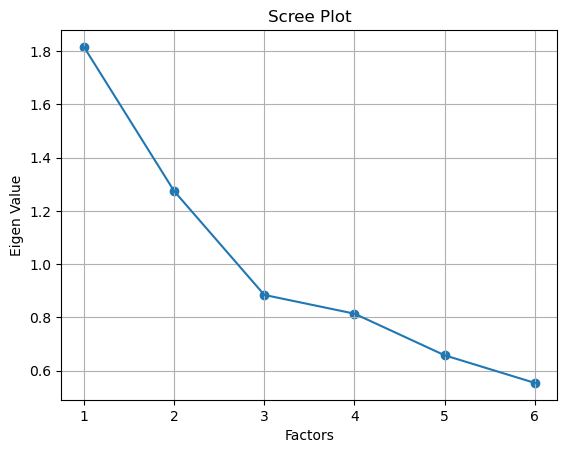

In [114]:
#Scree Plot
plt.scatter(range(1,X_num.shape[1]+1),ev_minres)
plt.plot(range(1,X_num.shape[1]+1),ev_minres)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

In [119]:
fa_minres = FactorAnalyzer(n_factors=3,rotation='varimax')
fa_minres.fit(X_num)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [120]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa_minres.get_eigenvalues()[0],columns=['EigenValues']))

   EigenValues
0     1.816001
1     1.274438
2     0.884367
3     0.813875
4     0.657550
5     0.553769


In [121]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa_minres.loadings_,index=X_num.columns))

                    0         1         2
Age          0.593924 -0.347367  0.165412
RestingBP    0.435501  0.026611  0.030146
Cholesterol  0.233609  0.464948 -0.438413
FastingBS    0.125996 -0.079317  0.578292
MaxHR       -0.286245  0.569049 -0.086870
Oldpeak      0.384253 -0.089845 -0.004917


In [122]:
with np.printoptions(suppress=True,precision=6):
    print(pd.DataFrame(fa_minres.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          0.842442  0.675728  0.562468
Proportional Var  0.140407  0.112621  0.093745
Cumulative Var    0.140407  0.253028  0.346773


In [124]:
with np.printoptions(precision=4,suppress=True):
    print(pd.DataFrame(fa_minres.get_communalities(),index=X_num.columns,columns=['Communalities']))

             Communalities
Age               0.500770
RestingBP         0.191278
Cholesterol       0.462956
FastingBS         0.356587
MaxHR             0.413300
Oldpeak           0.155746


Factor Analysis: Using Principal Components